In [1]:
import os
os.chdir(r'C:\Users\Veena Nigam\Desktop\Python project\Data Cleaning Projects')
os.getcwd()

'C:\\Users\\Veena Nigam\\Desktop\\Python project\\Data Cleaning Projects'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the numpy and pandas package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 


# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("dob_job_application_filings_subset.csv")

In [5]:
df.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Job #                         12846 non-null  int64  
 1   Doc #                         12846 non-null  int64  
 2   Borough                       12846 non-null  object 
 3   House #                       12846 non-null  object 
 4   Street Name                   12846 non-null  object 
 5   Block                         12846 non-null  int64  
 6   Lot                           12846 non-null  int64  
 7   Bin #                         12846 non-null  int64  
 8   Job Type                      12846 non-null  object 
 9   Job Status                    12846 non-null  object 
 10  Job Status Descrp             12846 non-null  object 
 11  Latest Action Date            12846 non-null  object 
 12  Building Type                 12846 non-null  object 
 13  C

In [7]:
# counting missing values
df.apply(lambda x: sum(x.isnull()))

Job #                0
Doc #                0
Borough              0
House #              0
Street Name          0
                  ... 
State                0
Zip                  0
Owner'sPhone #       0
Job Description    147
DOBRunDate           0
Length: 82, dtype: int64

In [8]:
#method 2:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]]
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [9]:
percentage_of_miss()

,Number of Missing,Percentage
Cluster,12846,1.000000
PC Filed,12846,1.000000
Owner Type,12846,1.000000
Adult Estab,12845,0.999922
Loft Board,12781,0.994940
Zoning Dist3,12758,0.993150
Vertical Enlrgmt,12704,0.988946
Horizontal Enlrgmt,12615,0.982018
Little e,12481,0.971586
Special District 2,11998,0.933987


#### Some Columns- Cluster,PC Filed, Owner Type, Adult Estab, Loft Board, Zoning Dist3, Vertical Enlrgmt, Horizontal Enlrgmt, Little e are having 100% or near to 100% missing values. I will drop those columns and handled the missing values for the rest of the data.

In [ ]:
drop_col = ['Cluster','PC Filed', 'Owner Type', 'Adult Estab', 'Loft Board', 'Zoning Dist3', 'Vertical Enlrgmt', 'Horizontal Enlrgmt', 'Little e']

In [10]:
df.drop(drop_col, inplace = True, axis=1)

In [11]:
df.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


In [12]:
df.tail()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
12841,520143988,1,STATEN ISLAND,8,NOEL STREET,5382,20,5069722,A2,D,...,MALITO,GENO MALITO,8,NOEL STREET,STATEN ISLAND,NY,10312,9174685659,HORIZONTAL ENLARGEMENT OF ATTACHED ONE CAR GAR...,06/13/2013 12:00:00 AM
12842,121613833,1,MANHATTAN,724,10 AVENUE,1059,4,1082503,A2,D,...,CROMAN,722-724 10TH AVENUE HOLDING LLC,632,BROADWAY,NEW YORK,NY,10012,2122289300,RENOVATION OF EXISTING APARTMENT #3B ON THIRD ...,06/13/2013 12:00:00 AM
12843,121681260,1,MANHATTAN,350,MANHATTAN AVE.,1848,31,1055849,A2,A,...,ARYEH,DG UWS LLC,619,WEST 54TH STREET,NEW YORK,NY,10019,2127652555,REPLACE BURNER IN EXSTG BOILER WITH NEW GAS BU...,06/13/2013 12:00:00 AM
12844,320771704,1,BROOKLYN,499,UNION STREET,431,43,3007185,A2,D,...,WIGGINS,N/A,77,PROSPECT PLACE,BROOKLYN,NY,11217,9178487799,INSTALL NEW SPRINKLER SYSTEM THROUGHOUT THE BU...,06/13/2013 12:00:00 AM
12845,520143951,1,STATEN ISLAND,1755,RICHMOND ROAD,887,28,5022931,A2,D,...,CAMBRIA,RONALD CAMBRIA,1755,RICHMOND ROAD,STATEN ISLAND,NY,10304,7184482740,INTERIOR PARTITIONS AND MINOR PLUMBING WORK TO...,06/13/2013 12:00:00 AM


In [13]:
percentage_of_miss()

,Number of Missing,Percentage
Special District 2,11998,0.933987
Non-Profit,11875,0.924412
City Owned,11427,0.889538
Fully Permitted,11351,0.883621
Zoning Dist2,11194,0.871400
Landmarked,10779,0.839094
Special District 1,9784,0.761638
Assigned,9029,0.702865
Approved,8784,0.683793
Professional Cert,5938,0.462245


In [14]:
#gettin columns' names specially sometimes there is a space or unders score in some columns' names
df_columns=df.columns
print(df_columns)

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board',
       'Landmarked', 'City Owned', 'eFiling Filed', 'Plumbing', 'Mechanical',
       'Boiler', 'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler',
       'Fire Alarm', 'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage',
       'ExistingNo. of Stories', 'Proposed No. of Stories', 'Existing Height',
       'Proposed Height', 'Existing Dwelling Units', 'Proposed Dwelli

In [15]:
#categrocial variables
df_cat=df.select_dtypes(include='object')
df_cat.columns

Index(['Borough', 'House #', 'Street Name', 'Job Type', 'Job Status',
       'Job Status Descrp', 'Latest Action Date', 'Building Type',
       'Community - Board', 'Landmarked', 'City Owned', 'eFiling Filed',
       'Plumbing', 'Mechanical', 'Boiler', 'Fuel Burning', 'Fuel Storage',
       'Standpipe', 'Sprinkler', 'Fire Alarm', 'Equipment', 'Fire Suppression',
       'Curb Cut', 'Other', 'Other Description', 'Applicant's First Name',
       'Applicant's Last Name', 'Applicant Professional Title',
       'Applicant License #', 'Professional Cert', 'Pre- Filing Date', 'Paid',
       'Fully Paid', 'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Dwelling Units',
       'Proposed Dwelling Units', 'Existing Occupancy', 'Proposed Occupancy',
       'Site Fill', 'Zoning Dist1', 'Zoning Dist2', 'Special District 1',
       'Special District 2', 'Non-Profit', 'Owner's First Name',
       'Owner's Last Name', 'Owner's Business Name', '

In [123]:
#numerical variables
df_num=df.select_dtypes(exclude='object')# Just get me the numeric variables
df_num.columns

Index(['Job #', 'Doc #', 'Block', 'Lot', 'Bin #', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage',
       'ExistingNo. of Stories', 'Proposed No. of Stories', 'Existing Height',
       'Proposed Height', 'Zip', 'Owner'sPhone #'],
      dtype='object')

In [17]:
# Getting the summary of Data
pd.options.display.float_format = "{:.2f}".format
df.describe()# for numeric columns

,Job #,Doc #,Block,Lot,Bin #,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Zip,Owner'sPhone #
count,12846.00,12846.00,12846.00,12846.00,12846.00,12846.00,12846.00,12846.00,12846.00,12846.00,12846.00,12846.00,12846.00,12846.00,12846.00
mean,242678752.23,1.16,2703.83,623.30,2314996.76,1439.97,2007.29,46.10,3.07,8.06,8.14,94.02,94.92,1210268.23,5025739492.77
std,131250668.41,0.51,3143.00,2000.93,1399062.33,38607.57,40815.70,784.22,37.25,11.87,11.84,146.92,146.58,13435876.97,2738211971.46
min,103643844.00,1.00,1.00,0.00,1000003.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,830.00,0.00
25%,121620595.75,1.00,836.00,12.00,1035728.00,0.00,0.00,0.00,0.00,1.00,2.00,20.00,21.00,10019.00,2126841161.50
50%,220264464.50,1.00,1411.50,32.00,2004234.50,0.00,0.00,0.00,0.00,4.00,4.00,45.00,45.00,10310.00,5169379046.00
75%,320865174.75,1.00,3355.00,59.00,3343823.00,0.00,0.00,0.00,0.00,9.00,9.00,105.00,107.00,11221.00,7186808695.75
max,540024604.00,9.00,99999.00,9078.00,5864852.00,2873107.00,2873107.00,50384.00,3160.00,102.00,102.00,4200.00,4200.00,606313512.00,9787265918.00


In [18]:
#finding just unique values
df.apply(lambda x: len(x.unique()))

Job #              11658
Doc #                  9
Borough                5
House #             3485
Street Name         3594
                   ...  
State                 29
Zip                  571
Owner'sPhone #      6135
Job Description    10299
DOBRunDate            73
Length: 73, dtype: int64

In [19]:
#Find the Frequency of each items

#categrocial variables
df_cat=df.select_dtypes(include='object')
df_cat.apply(lambda x:print( x.value_counts()))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
1               141
200              99
350              93
150              74
100              67
               ... 
22-66             1
33-09             1
70-11             1
50-36             1
85-12             1
Name: House #, Length: 3485, dtype: int64
BROADWAY                            399
PARK AVENUE                         215
MADISON AVENUE                      209
FIFTH AVENUE                        168
LEXINGTON AVENUE                    111
                                   ... 
UNIVERSITY AVE                        1
BEACH 149 STREET                      1
21 AVENUE                             1
NEWTOWN AVENUE                        1
WEST 107TH ST.                        1
Name: Street Name, Length: 3594, dtype: int64
A2    8399
A3    2491
A1     816
NB     693
DM     234
PA     140
SC      39
SI      34
Name: Job Type, dtype: int

Borough                         None
House #                         None
Street Name                     None
Job Type                        None
Job Status                      None
Job Status Descrp               None
Latest Action Date              None
Building Type                   None
Community - Board               None
Landmarked                      None
City Owned                      None
eFiling Filed                   None
Plumbing                        None
Mechanical                      None
Boiler                          None
Fuel Burning                    None
Fuel Storage                    None
Standpipe                       None
Sprinkler                       None
Fire Alarm                      None
Equipment                       None
Fire Suppression                None
Curb Cut                        None
Other                           None
Other Description               None
Applicant's First Name          None
Applicant's Last Name           None
A

#### There are certain columns having '#' key, we can rename those columns by removing the '#' key.

In [20]:
df1=df.rename(columns=lambda x:x.strip('# '))

# Removing the spaces after the column names
df1.columns=df1.columns.str.replace(' ','')

In [21]:
df1.head()

,Job,Doc,Borough,House,Street Name,Block,Lot,Bin,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


#### Going through the numerical columns one by one

In [124]:
df_num.columns

Index(['Job #', 'Doc #', 'Block', 'Lot', 'Bin #', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage',
       'ExistingNo. of Stories', 'Proposed No. of Stories', 'Existing Height',
       'Proposed Height', 'Zip', 'Owner'sPhone #'],
      dtype='object')

In [125]:
df_num.drop(['Job #', 'Doc #', 'Block', 'Lot', 'Bin #'],axis=1,inplace=True)

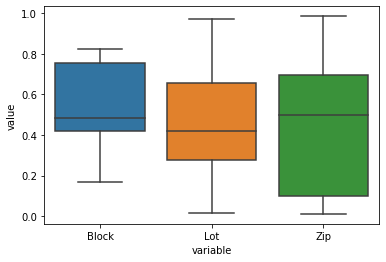

In [120]:
df_num = pd.DataFrame(data = np.random.random(size=(12,3)), columns = ['Block', 'Lot','Zip'])
sns.boxplot(x="variable", y="value", data=pd.melt(df_num))

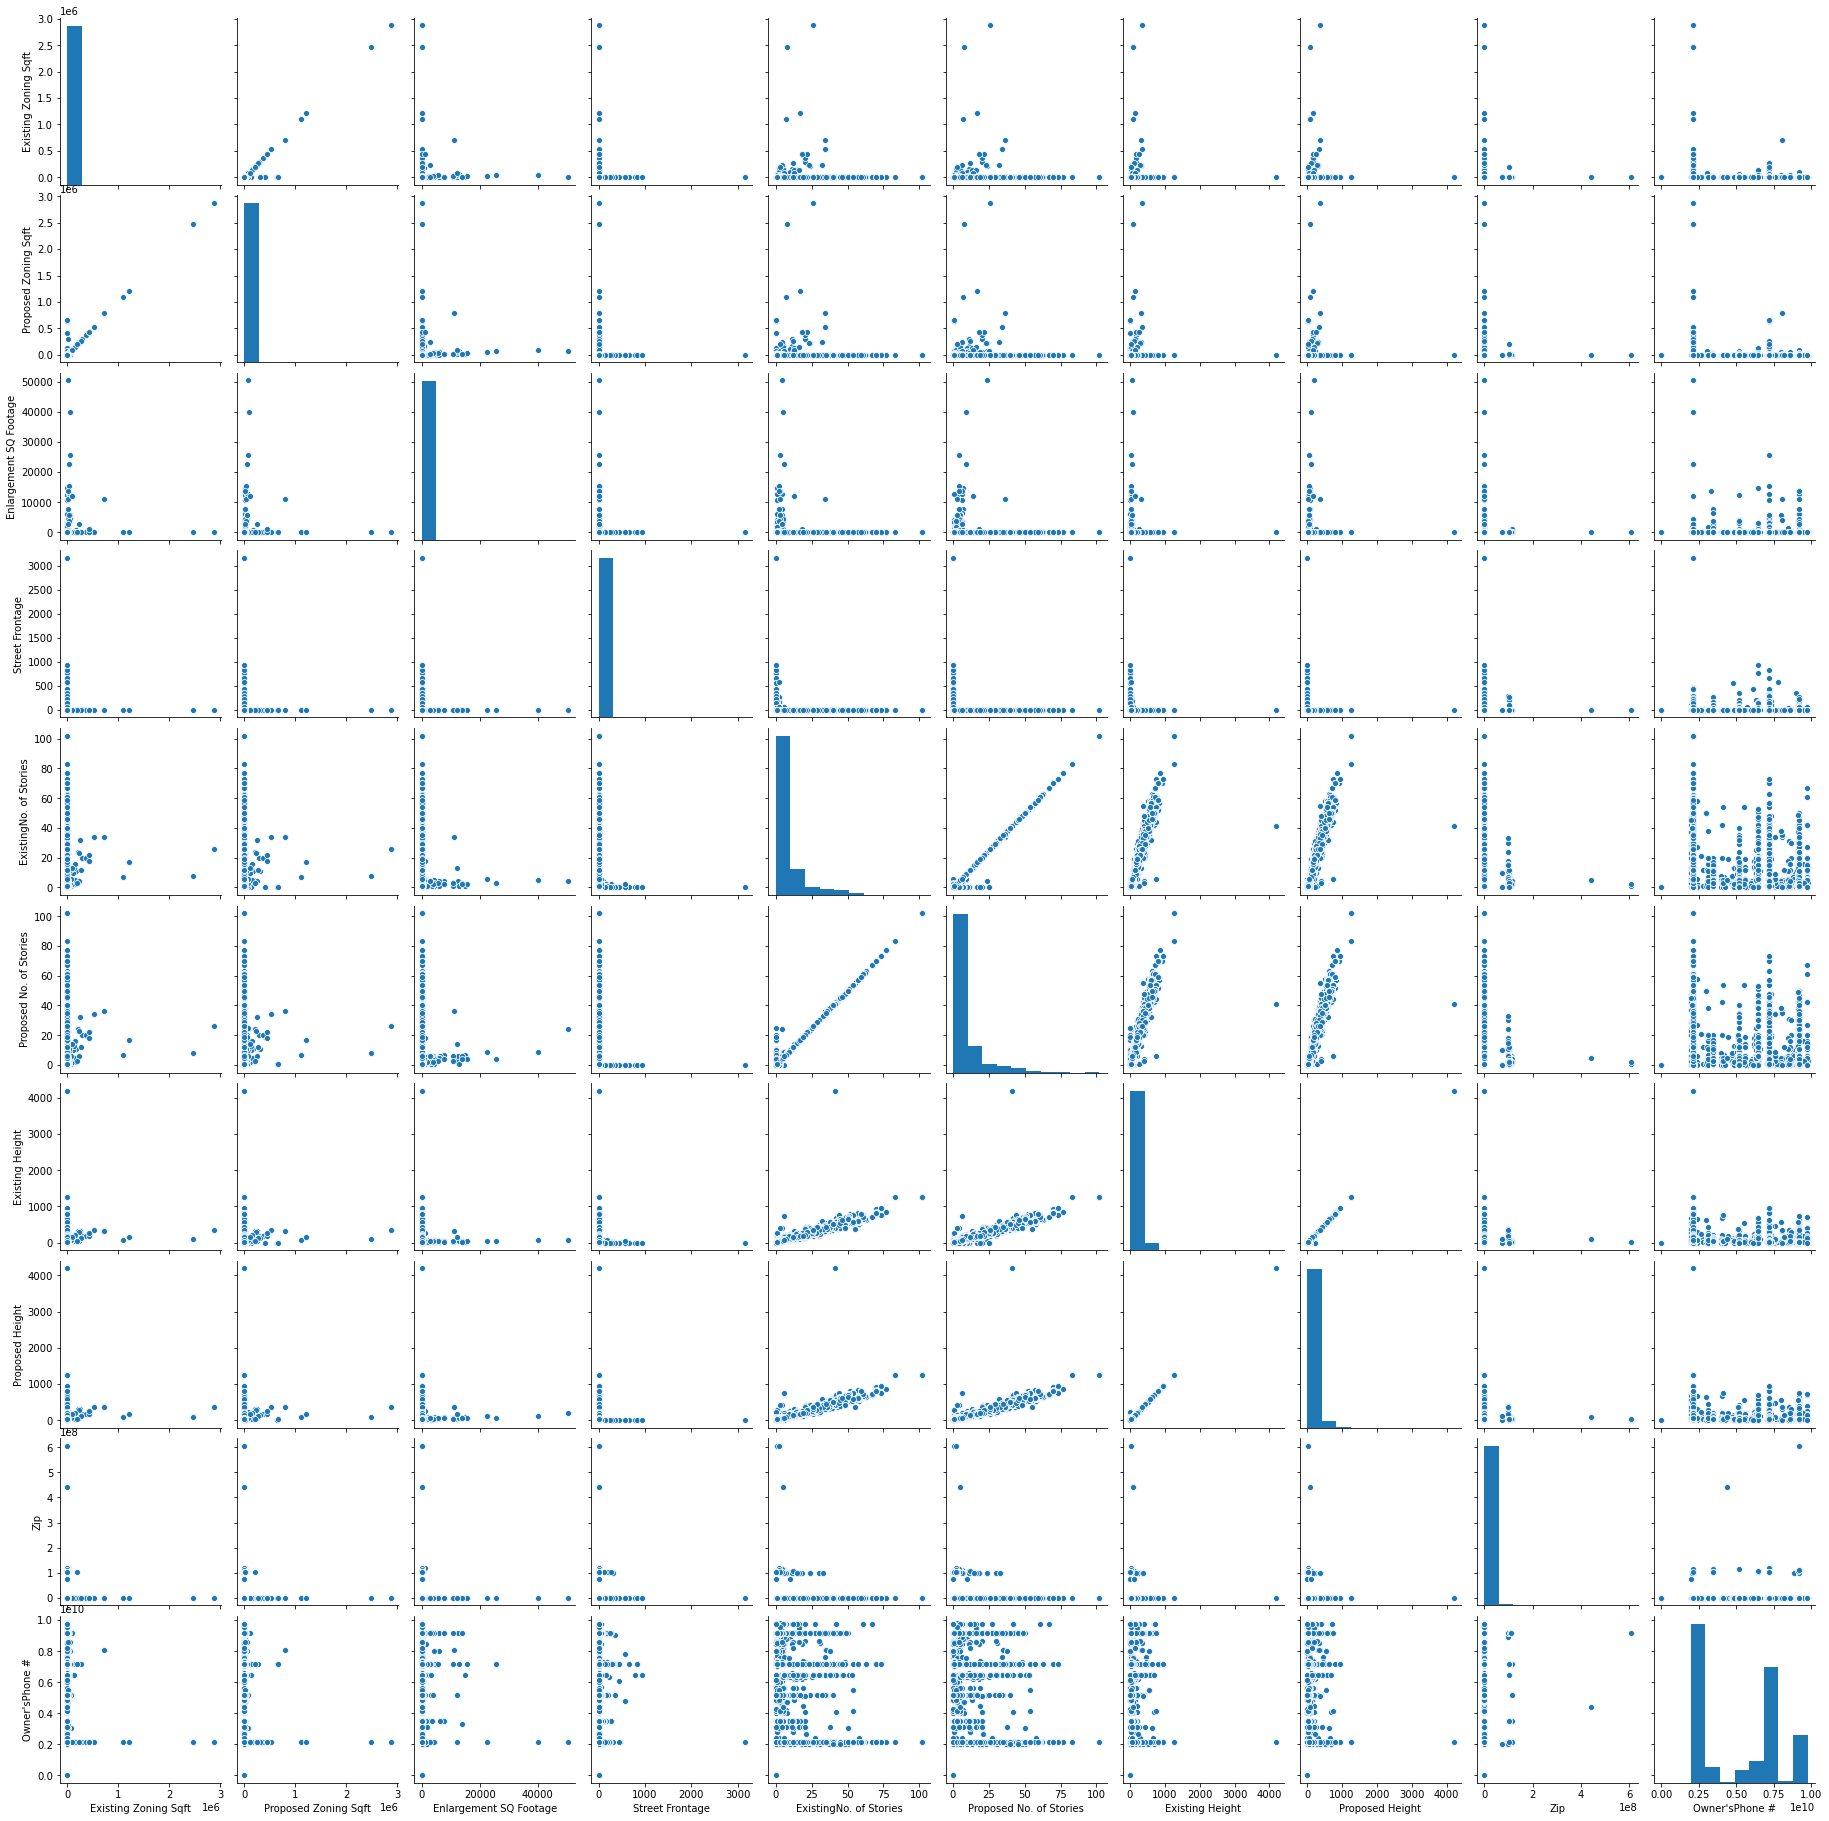

In [126]:
sns.pairplot(df_num)

#### Doc Column

In [22]:
df1['Doc'].describe()

count   12846.00
mean        1.16
std         0.51
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         9.00
Name: Doc, dtype: float64

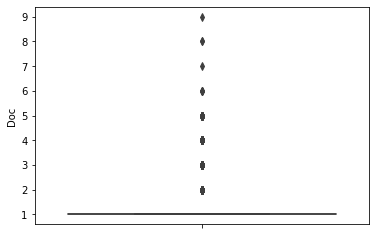

In [24]:
sns.boxplot(y=df1['Doc'])

#### Block Column

In [25]:
df1['Block'].describe()

count   12846.00
mean     2703.83
std      3143.00
min         1.00
25%       836.00
50%      1411.50
75%      3355.00
max     99999.00
Name: Block, dtype: float64

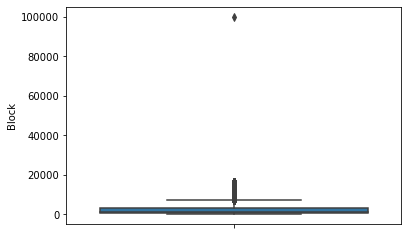

In [26]:
sns.boxplot(y=df1['Block'])

In [27]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)
    LIF=Q1-1.5*(IQR)
    df1_out =df1[(df1[col]<LIF) | (df1[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.distplot(df1_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return df1_out[col] .describe()

count    1151.00
mean    10396.59
std      3968.90
min      7134.00
25%      7898.50
50%      9273.00
75%     12122.00
max     99999.00
Name: Block, dtype: float64

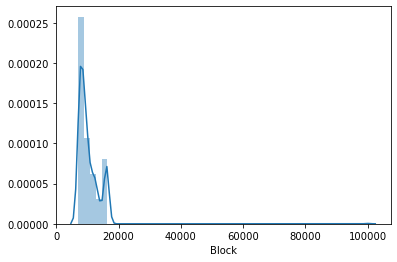

In [28]:
outlier_analysis('Block')

#### Lot Column

In [29]:
df1['Lot'].describe()

count   12846.00
mean      623.30
std      2000.93
min         0.00
25%        12.00
50%        32.00
75%        59.00
max      9078.00
Name: Lot, dtype: float64

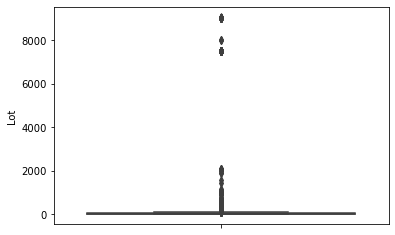

In [30]:
sns.boxplot(y = df1['Lot'])

In [53]:

# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = df1['Lot']
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Percentiles: 25th=1.000, 75th=1.000, IQR=0.000
Identified outliers: 26
Non-outlier observations: 12820


In [87]:
data = df1[['Lot']]

In [88]:
from scipy import stats
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(12846, 1)

In [89]:
df1.drop('Lot',axis=1)


,Job,Doc,Borough,House,Street Name,Block,Bin,Job Type,Job Status,Job Status Descrp,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,1016890,A2,D,APPLICATION PROCESSED - ENTIRE,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,5161350,A3,A,PRE-FILING,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,1053831,A2,Q,PERMIT ISSUED - PARTIAL JOB,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,1015610,A2,D,APPLICATION PROCESSED - ENTIRE,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,1015754,A3,D,APPLICATION PROCESSED - ENTIRE,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12841,520143988,1,STATEN ISLAND,8,NOEL STREET,5382,5069722,A2,D,APPLICATION PROCESSED - ENTIRE,...,MALITO,GENO MALITO,8,NOEL STREET,STATEN ISLAND,NY,10312,9174685659,HORIZONTAL ENLARGEMENT OF ATTACHED ONE CAR GAR...,06/13/2013 12:00:00 AM
12842,121613833,1,MANHATTAN,724,10 AVENUE,1059,1082503,A2,D,APPLICATION PROCESSED - ENTIRE,...,CROMAN,722-724 10TH AVENUE HOLDING LLC,632,BROADWAY,NEW YORK,NY,10012,2122289300,RENOVATION OF EXISTING APARTMENT #3B ON THIRD ...,06/13/2013 12:00:00 AM
12843,121681260,1,MANHATTAN,350,MANHATTAN AVE.,1848,1055849,A2,A,PRE-FILING,...,ARYEH,DG UWS LLC,619,WEST 54TH STREET,NEW YORK,NY,10019,2127652555,REPLACE BURNER IN EXSTG BOILER WITH NEW GAS BU...,06/13/2013 12:00:00 AM
12844,320771704,1,BROOKLYN,499,UNION STREET,431,3007185,A2,D,APPLICATION PROCESSED - ENTIRE,...,WIGGINS,N/A,77,PROSPECT PLACE,BROOKLYN,NY,11217,9178487799,INSTALL NEW SPRINKLER SYSTEM THROUGHOUT THE BU...,06/13/2013 12:00:00 AM


In [91]:
df1['Lot'] = data_clean['Lot']

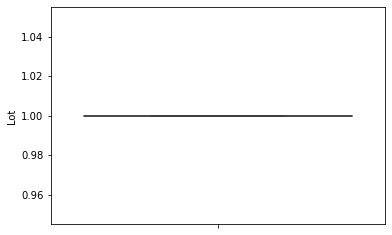

In [92]:
sns.boxplot(y = df1['Lot'])

#### Existing Zoning Sqft Column

In [59]:
df1.columns

Index(['Job', 'Doc', 'Borough', 'House', 'Street Name', 'Block', 'Lot', 'Bin',
       'Job Type', 'Job Status', 'Job Status Descrp', 'Latest Action Date',
       'Building Type', 'Community - Board', 'Landmarked', 'City Owned',
       'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler', 'Fuel Burning',
       'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm', 'Equipment',
       'Fire Suppression', 'Curb Cut', 'Other', 'Other Description',
       'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage',
       'ExistingNo. of Stories', 'Proposed No. of Stories', 'Existing Height',
       'Proposed Height', 'Existing Dwelling Units', 'Proposed Dwelling Units',

In [61]:
df1['Existing Zoning Sqft'].describe()

count     12846.00
mean       1439.97
std       38607.57
min           0.00
25%           0.00
50%           0.00
75%           0.00
max     2873107.00
Name: Existing Zoning Sqft, dtype: float64

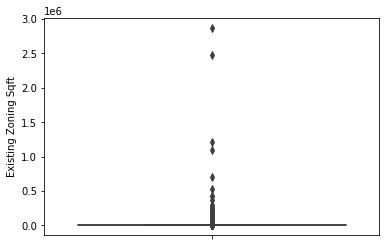

In [62]:
sns.boxplot(y = df1['Existing Zoning Sqft'])

In [64]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = df1['Existing Zoning Sqft']
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 703
Non-outlier observations: 12143


In [65]:
data = df1[['Existing Zoning Sqft']]

In [66]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(12143, 1)

In [73]:
len(data_clean['Existing Zoning Sqft'])

12846

In [74]:
df1.drop("Existing Zoning Sqft", axis=1)

,Job,Doc,Borough,House,Street Name,Block,Lot,Bin,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,1,1016890,A2,D,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,1,1053831,A2,Q,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,1,1015610,A2,D,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,1,1015754,A3,D,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12841,520143988,1,STATEN ISLAND,8,NOEL STREET,5382,1,5069722,A2,D,...,MALITO,GENO MALITO,8,NOEL STREET,STATEN ISLAND,NY,10312,9174685659,HORIZONTAL ENLARGEMENT OF ATTACHED ONE CAR GAR...,06/13/2013 12:00:00 AM
12842,121613833,1,MANHATTAN,724,10 AVENUE,1059,1,1082503,A2,D,...,CROMAN,722-724 10TH AVENUE HOLDING LLC,632,BROADWAY,NEW YORK,NY,10012,2122289300,RENOVATION OF EXISTING APARTMENT #3B ON THIRD ...,06/13/2013 12:00:00 AM
12843,121681260,1,MANHATTAN,350,MANHATTAN AVE.,1848,1,1055849,A2,A,...,ARYEH,DG UWS LLC,619,WEST 54TH STREET,NEW YORK,NY,10019,2127652555,REPLACE BURNER IN EXSTG BOILER WITH NEW GAS BU...,06/13/2013 12:00:00 AM
12844,320771704,1,BROOKLYN,499,UNION STREET,431,1,3007185,A2,D,...,WIGGINS,N/A,77,PROSPECT PLACE,BROOKLYN,NY,11217,9178487799,INSTALL NEW SPRINKLER SYSTEM THROUGHOUT THE BU...,06/13/2013 12:00:00 AM


In [75]:
df1["Existing Zoning Sqft"] = data_clean["Existing Zoning Sqft"]

In [77]:
len(df1['Existing Zoning Sqft'])

12846

In [69]:
#####df1['Existing Zoning Sqft'].replace(data_clean['Existing Zoning Sqft'],inplace=True)

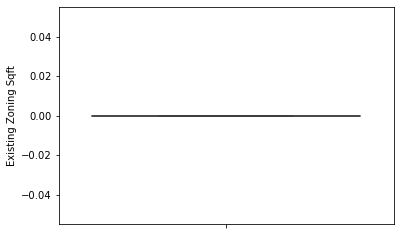

In [78]:
sns.boxplot(y=df1['Existing Zoning Sqft'])

#### Proposed Zoning Sqft Column

In [93]:
df1['Proposed Zoning Sqft'].describe()

count     12846.00
mean       2007.29
std       40815.70
min           0.00
25%           0.00
50%           0.00
75%           0.00
max     2873107.00
Name: Proposed Zoning Sqft, dtype: float64

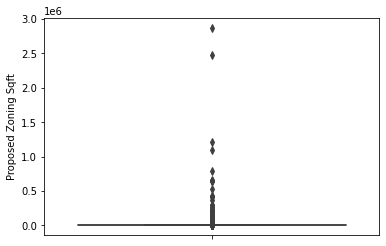

In [94]:
sns.boxplot( y = df1['Proposed Zoning Sqft'])

In [98]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = df1['Proposed Zoning Sqft']
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 1132
Non-outlier observations: 11714


In [99]:
data = df1[['Proposed Zoning Sqft']]

In [100]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(11714, 1)

In [103]:
df1.drop('Proposed Zoning Sqft', axis=1)
df1['Proposed Zoning Sqft']= data_clean['Proposed Zoning Sqft']


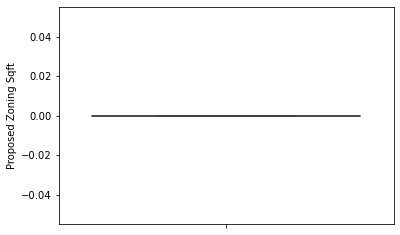

In [104]:
sns.boxplot(y = df1['Proposed Zoning Sqft'])

In [105]:
df1['Proposed Zoning Sqft'].isnull().sum()

1132